In [1]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 1.8 MB/s eta 0:00:00


In [2]:
#Libraries
import re
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import neattext.functions as nt
from textblob import TextBlob
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
twitter_DataFrame = pd.read_csv('/content/Twitter_Dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
twitter_DataFrame.sample(5)

,target,ids,date,flag,user,text
321461,0,2003761571,Tue Jun 02 07:06:11 PDT 2009,NO_QUERY,jlshaver,Todays the day....not ready for it. very bitt...
713289,0,2258788254,Sat Jun 20 16:29:59 PDT 2009,NO_QUERY,alliearone,Gay the parrot pictures are really ugly.
90590,0,1759077201,Sun May 10 18:24:33 PDT 2009,NO_QUERY,JAKAZiD,@smitethis Really sorry I missed you last nigh...
133178,0,1835937117,Mon May 18 07:03:08 PDT 2009,NO_QUERY,alessiaguarnera,"History final today, cant wait for it to be ov..."
767635,0,2300583612,Tue Jun 23 14:19:55 PDT 2009,NO_QUERY,demalem,@megancapri probably i have a habit of doing ...


In [4]:
sample_size = 10000
sampled_data = twitter_DataFrame.sample(n=sample_size, random_state=42)

In [5]:
sampled_data.info()
sampled_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 462211 to 634
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  int64 
 1   ids     10000 non-null  int64 
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 546.9+ KB


(10000, 6)

In [6]:
# Pre processing
def preprocess_text(tweet):
    # Step 1: Converting to lowercase
    tweet = tweet.lower()

    # Step 2: Removal of HTML tags
    tweet = re.sub(r'<.*?>', '', tweet)

    # Step 3: Special characters and punctuation removal
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)

    # Step 4:  Stopwords Removal
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(tweet)
    words = [word for word in words if word.lower() not in stop_words]

    # Step 5: URLs Removal
    tweet = re.sub(r'http\S+', '', tweet)

    # Step 6: RTs removal
    tweet = re.sub(r'RT[\s]+', '', tweet)

    # Step 7: Join the words back into a string
    preprocess_text = ' '.join(words)

    return preprocess_text




In [7]:
sampled_data['preprocess_text'] = sampled_data['text'].apply(preprocess_text)

In [8]:
New_dataset = sampled_data[['ids', 'preprocess_text']]

In [9]:
New_dataset.head(10)

,ids,preprocess_text
462211,2174633709,bored would go bad eventually lol hey dont mak...
906600,1695475403,mynameismo good morning heres hoping good one ya
953710,1824695185,makeup stuffs gon na good day
777548,2322447234,crying sleep really really really wanted go
644707,2236096768,getting hungry fair
78646,1751461265,says one thingi really really miss booby hatch...
892632,1691270862,planted peas basil cat nip parsley fire escape...
491665,2183909614,nice massage rest day isnt going good excited ...
76563,1695724319,cat pased away today thats really sad day toda...
17327,1556241519,worldvillage wish seen sf punditz show night


In [10]:
New_dataset.to_csv('NewTwitterDataset.csv', index=False)

In [11]:
New_dataset.head()

,ids,preprocess_text
462211,2174633709,bored would go bad eventually lol hey dont mak...
906600,1695475403,mynameismo good morning heres hoping good one ya
953710,1824695185,makeup stuffs gon na good day
777548,2322447234,crying sleep really really really wanted go
644707,2236096768,getting hungry fair


In [12]:
def get_sentiment(tweet):
    #TextBlob object
    text_blob = TextBlob(tweet)

    # Polarity of the text sentiment
    sentiment_polarity = text_blob.sentiment.polarity

    # Classification of sentiment based on the polarity
    if sentiment_polarity > 0:
        return 'positive'
    elif sentiment_polarity < 0:
        return 'negative'
    else:
        return 'neutral'


In [13]:
# Adding sentiment
New_dataset['sentiment'] = New_dataset['preprocess_text'].apply(get_sentiment)

<ipython-input-13-164466556105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataset['sentiment'] = New_dataset['preprocess_text'].apply(get_sentiment)


In [14]:
New_dataset.head()

,ids,preprocess_text,sentiment
462211,2174633709,bored would go bad eventually lol hey dont mak...,negative
906600,1695475403,mynameismo good morning heres hoping good one ya,positive
953710,1824695185,makeup stuffs gon na good day,positive
777548,2322447234,crying sleep really really really wanted go,neutral
644707,2236096768,getting hungry fair,positive


In [15]:
New_dataset['sentiment'].value_counts()

neutral     3767
positive    3622
negative    2611
Name: sentiment, dtype: int64

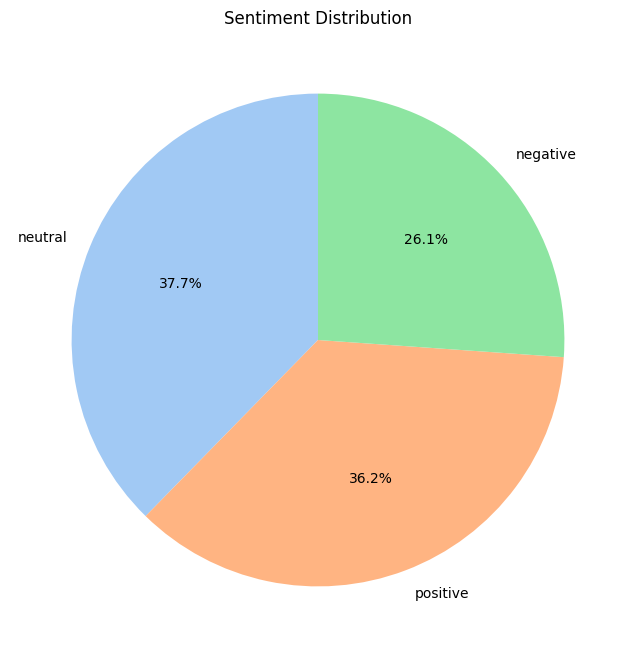

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment counts
counts = New_dataset['sentiment'].value_counts()

# Custom colors
colors = sns.color_palette("pastel")

# Plotting a pie chart with custom colors
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sentiment Distribution")
plt.show()



In [17]:
#Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 50000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(New_dataset['preprocess_text'].values)
X = tokenizer.texts_to_sequences(New_dataset['preprocess_text'].values)
X = pad_sequences(X, maxlen=100)

In [18]:
#Stemming
import nltk
st = nltk.PorterStemmer()
def stemming(val):
  text = [st.stem(word) for word in val]
  return val
New_dataset['preprocess_text']=New_dataset['preprocess_text'].apply(lambda x: stemming(x))
New_dataset['preprocess_text']

<ipython-input-18-91990adc14a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataset['preprocess_text']=New_dataset['preprocess_text'].apply(lambda x: stemming(x))


462211    bored would go bad eventually lol hey dont mak...
906600     mynameismo good morning heres hoping good one ya
953710                        makeup stuffs gon na good day
777548          crying sleep really really really wanted go
644707                                  getting hungry fair
                                ...                        
888331                               realized day work week
927680                                          hiiiii jada
332665                       feels stupid dont exactly know
973991                    lets get back eden live top world
634                                               make shit
Name: preprocess_text, Length: 10000, dtype: object

In [19]:
#Lemmatization
lm = nltk.WordNetLemmatizer()
def lemmatizing(val):
  text = [lm.lemmatize(word) for word in val]
  return val
New_dataset['preprocess_text']=New_dataset['preprocess_text'].apply(lambda x: lemmatizing(x))
New_dataset['preprocess_text']


<ipython-input-19-06bbf7ea2ebc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataset['preprocess_text']=New_dataset['preprocess_text'].apply(lambda x: lemmatizing(x))


462211    bored would go bad eventually lol hey dont mak...
906600     mynameismo good morning heres hoping good one ya
953710                        makeup stuffs gon na good day
777548          crying sleep really really really wanted go
644707                                  getting hungry fair
                                ...                        
888331                               realized day work week
927680                                          hiiiii jada
332665                       feels stupid dont exactly know
973991                    lets get back eden live top world
634                                               make shit
Name: preprocess_text, Length: 10000, dtype: object

In [20]:
#LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout

embedding_dim = 256
lstm_units = 128
vocab_size = max_features
#6 layers
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 256)          12800000  
                                                                 
 spatial_dropout1d (Spatial  (None, 100, 256)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                        

In [21]:
from sklearn.model_selection import train_test_split
one_hot_sentiment = pd.get_dummies(New_dataset['sentiment']).values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_sentiment, test_size=0.2, random_state=42)

In [23]:
#Accuracies and losses of Training and Validation set
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/10
225/225 [==============================] - 59s 224ms/step - loss: 0.8118 - accuracy: 0.6294 - val_loss: 0.4218 - val_accuracy: 0.8587
Epoch 2/10
225/225 [==============================] - 45s 200ms/step - loss: 0.2343 - accuracy: 0.9297 - val_loss: 0.3146 - val_accuracy: 0.8950
Epoch 3/10
225/225 [==============================] - 42s 188ms/step - loss: 0.0822 - accuracy: 0.9774 - val_loss: 0.3503 - val_accuracy: 0.8763
Epoch 4/10
225/225 [==============================] - 43s 190ms/step - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.4099 - val_accuracy: 0.8813
Epoch 5/10
225/225 [==============================] - 44s 196ms/step - loss: 0.0324 - accuracy: 0.9910 - val_loss: 0.4334 - val_accuracy: 0.8925
Epoch 6/10
225/225 [==============================] - 42s 188ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.4719 - val_accuracy: 0.8612
Epoch 7/10
225/225 [==============================] - 43s 192ms/step - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.5145 - val_ac

In [24]:
#Test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Score: {test_loss:.4f} (loss) / {test_accuracy * 100:.2f}% (accuracy)')

63/63 - 2s - loss: 0.7756 - accuracy: 0.8655 - 2s/epoch - 36ms/step
Test Accuracy: 86.55%
Test Loss: 0.7756
Test Score: 0.7756 (loss) / 86.55% (accuracy)


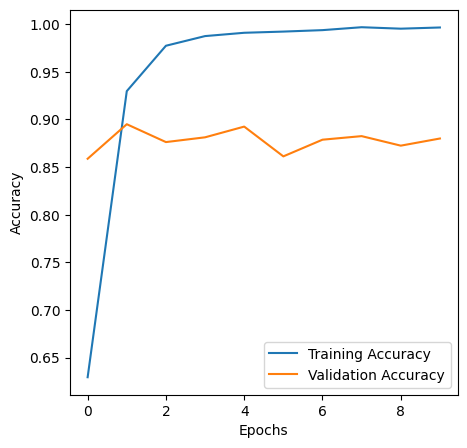

In [25]:
import matplotlib.pyplot as plt

#Accuracy plots
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


63/63 [==============================] - 3s 42ms/step


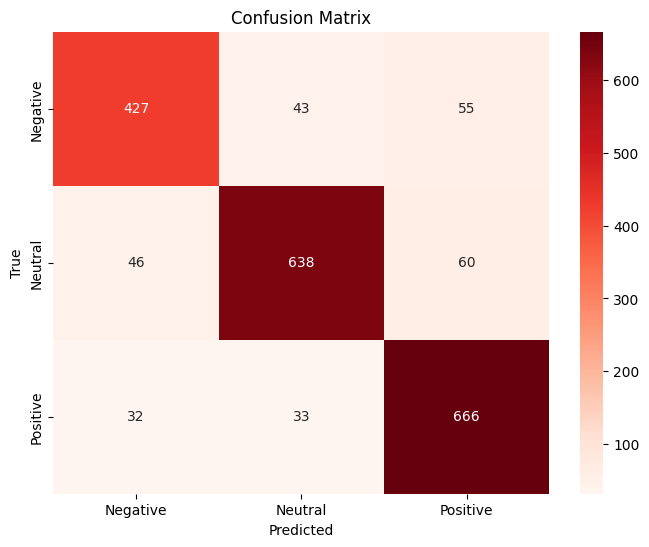

In [26]:
#Validation data
Y_pred = model.predict(X_test)
# Converting one-hot encoded predictions back to labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix

#Confusion matrix
confusion_mat = confusion_matrix(Y_true_labels, Y_pred_labels)

# Plot for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [27]:
#Bi-LSTM Model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
lstm_units = 100

model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=X.shape[1]))
model1.add(SpatialDropout1D(0.4))
model1.add(Bidirectional((LSTM(lstm_units))))
model1.add(Dense(3, activation='softmax'))
optimizer = Adam(learning_rate=1e-3)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model1.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          6400000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 128)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 200)               183200    
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 3)                 603       
                                                                 
Total params: 6583803 (25.12 MB)
Trainable params: 6583803 (25.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [28]:
#Accuracies and losses of Training and Validation set
epochs = 10
history = model1.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1)

Epoch 1/10
225/225 [==============================] - 16s 52ms/step - loss: 0.8049 - accuracy: 0.6318 - val_loss: 0.4232 - val_accuracy: 0.8500
Epoch 2/10
225/225 [==============================] - 4s 20ms/step - loss: 0.2240 - accuracy: 0.9310 - val_loss: 0.3179 - val_accuracy: 0.8888
Epoch 3/10
225/225 [==============================] - 4s 17ms/step - loss: 0.0779 - accuracy: 0.9792 - val_loss: 0.3596 - val_accuracy: 0.8650
Epoch 4/10
225/225 [==============================] - 3s 15ms/step - loss: 0.0377 - accuracy: 0.9894 - val_loss: 0.3785 - val_accuracy: 0.8813
Epoch 5/10
225/225 [==============================] - 3s 13ms/step - loss: 0.0238 - accuracy: 0.9942 - val_loss: 0.3846 - val_accuracy: 0.8813
Epoch 6/10
225/225 [==============================] - 3s 13ms/step - loss: 0.0281 - accuracy: 0.9921 - val_loss: 0.4264 - val_accuracy: 0.8725
Epoch 7/10
225/225 [==============================] - 3s 14ms/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 0.4508 - val_accuracy: 0.871

In [29]:
#Test set
test_loss, test_accuracy = model1.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Score: {test_loss:.4f} (loss) / {test_accuracy * 100:.2f}% (accuracy)')

63/63 - 1s - loss: 0.6795 - accuracy: 0.8575 - 1s/epoch - 18ms/step
Test Accuracy: 85.75%
Test Loss: 0.6795
Test Score: 0.6795 (loss) / 85.75% (accuracy)


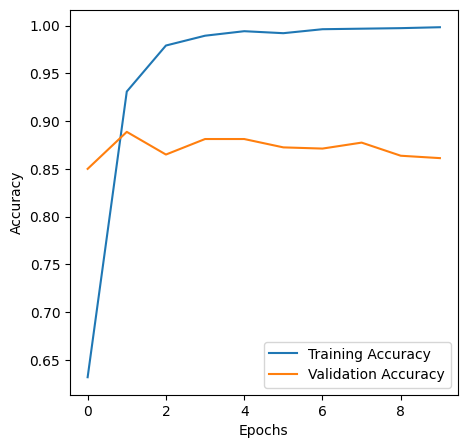

In [30]:
#Training and Validation accuracy
plt.figure(figsize=(11, 5))
plt.subplot(1,2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


63/63 [==============================] - 3s 10ms/step


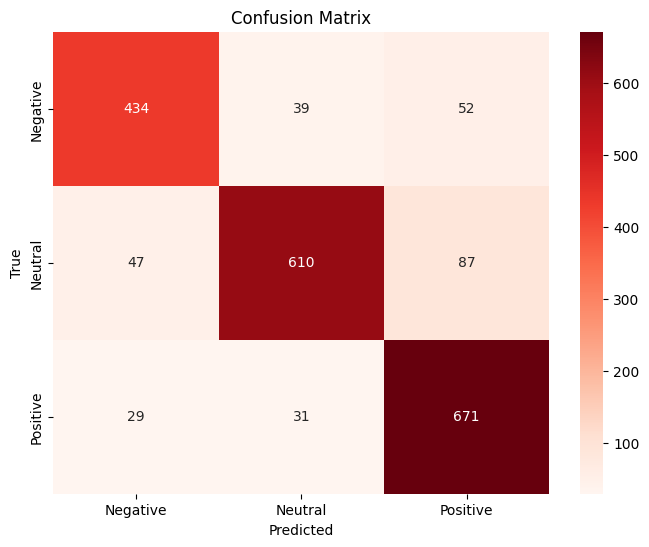

In [31]:
# Validation data
Y_pred = model1.predict(X_test)
# Converting one-hot encoded predictions back to labels
Y_pred_labels = np.argmax(Y_pred, axis=1)
Y_true_labels = np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix

# Confusion matrix
confusion_mat = confusion_matrix(Y_true_labels, Y_pred_labels)

# Plot for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
